In [152]:
import pandas as pd

import matplotlib.pyplot as plt

import seaborn as sns

import numpy as np

In [153]:
aisles = pd.read_csv('aisles.csv')

departments = pd.read_csv('departments.csv')

order_products_prior = pd.read_csv('order_products__prior.csv')

order_products_train = pd.read_csv('order_products__train.csv')

orders = pd.read_csv('orders.csv')

products = pd.read_csv('products.csv')

In [154]:
products = pd.merge(aisles, products, on='aisle_id')
products = pd.merge(departments, products, on='department_id')
products = pd.merge(order_products_train, products, on='product_id')

In [155]:
products_and_orders = pd.merge(products, orders, on='order_id')

In [156]:
#Creating a df for items in each basket
baskets = (products_and_orders.groupby(['order_id']))['product_name'].agg(list).reset_index()
baskets.rename(columns={'product_name':'basket'}, inplace=True)
baskets.drop('order_id', axis=1, inplace=True)
baskets.head()


,basket
0,"[Bulgarian Yogurt, Organic 4% Milk Fat Whole M..."
1,"[Grated Pecorino Romano Cheese, Spring Water, ..."
2,"[Shelled Pistachios, Organic Biologique Limes,..."
3,"[Roasted Turkey, Organic Cucumber, Organic Gra..."
4,"[Bag of Organic Bananas, Organic Raspberries, ..."


In [165]:
#Market basket analysis
import mlxtend
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules

# Convert the 'basket' column in the 'baskets' DataFrame into a list of lists
baskets_list = baskets['basket'].tolist()
baskets_list_sample = baskets_list[:30000]

# Convert the dataset into a transaction format
te = TransactionEncoder()
te_ary = te.fit(baskets_list_sample).transform(baskets_list_sample)
df = pd.DataFrame(te_ary, columns=te.columns_)

# remove columns when sum of true rows is less than 1
df = df.loc[:, df.sum() > 1]

# Apply Apriori algorithm to find frequent itemsets
frequent_itemsets = apriori(df, min_support=0.005, use_colnames=True)

# Generate association rules
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.01)

# Display the association rules
rules.sort_values(by='confidence', ascending=False).head(20)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
231,"(Organic Hass Avocado, Organic Strawberries)",(Bag of Organic Bananas),0.011633,0.118600,0.005833,0.501433,4.227931,0.004454,1.767866,0.772464
238,"(Organic Strawberries, Organic Raspberries)",(Bag of Organic Bananas),0.011700,0.118600,0.005233,0.447293,3.771446,0.003846,1.594698,0.743549
94,(Organic Fuji Apple),(Banana),0.024967,0.141467,0.009267,0.371162,2.623668,0.005735,1.365269,0.634701
36,(Organic Kiwi),(Bag of Organic Bananas),0.014233,0.118600,0.005267,0.370023,3.119928,0.003579,1.399100,0.689291
43,(Organic Navel Orange),(Bag of Organic Bananas),0.015167,0.118600,0.005467,0.360440,3.039119,0.003668,1.378134,0.681290
236,"(Bag of Organic Bananas, Organic Raspberries)",(Organic Strawberries),0.014633,0.083067,0.005233,0.357631,4.305349,0.004018,1.427425,0.779132
45,(Organic Raspberries),(Bag of Organic Bananas),0.041700,0.118600,0.014633,0.350919,2.958847,0.009688,1.357920,0.690838
39,(Organic Large Extra Fancy Fuji Apple),(Bag of Organic Bananas),0.022567,0.118600,0.007767,0.344165,2.901901,0.005090,1.343936,0.670530
77,(Honeycrisp Apple),(Banana),0.027633,0.141467,0.009333,0.337756,2.387533,0.005424,1.296401,0.597673
25,(Organic D'Anjou Pears),(Bag of Organic Bananas),0.015033,0.118600,0.005000,0.332594,2.804336,0.003217,1.320636,0.653230


 For example, if the antecedent support is 0.01192, it means that approximately 1.192% of all transactions in the dataset contain the specific combination of items in the antecedent itemset.
 
 In the context of market basket analysis, a lift value of 3.95 implies that customers who purchase the antecedent itemset are almost four times more likely to purchase the consequent itemset as well. This insight can be valuable for understanding purchasing patterns, optimizing product placements, and designing targeted marketing strategies.

 In this case, a confidence of 0.463 indicates that 46.3% of transactions containing the antecedent itemset also contain the consequent itemset.

 A conviction value of 1.644 suggests that the consequent itemset is 1.644 times more likely to occur without the antecedent itemset than would be expected if the two itemsets were independent.

 The magnitude of the Zhang's metric value provides insights into the strength of association. Values closer to 1 indicate moderate associations, while values further away from 1 (either higher or lower) indicate stronger associations.

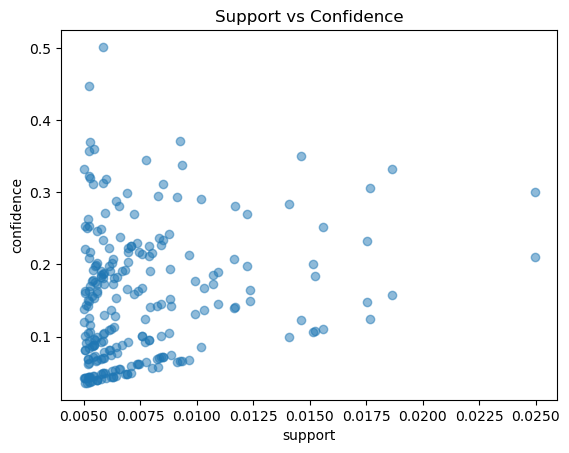

In [166]:
# Visualize the association rules
plt.scatter(rules['support'], rules['confidence'], alpha=0.5)
plt.xlabel('support')
plt.ylabel('confidence')
plt.title('Support vs Confidence')
plt.show()

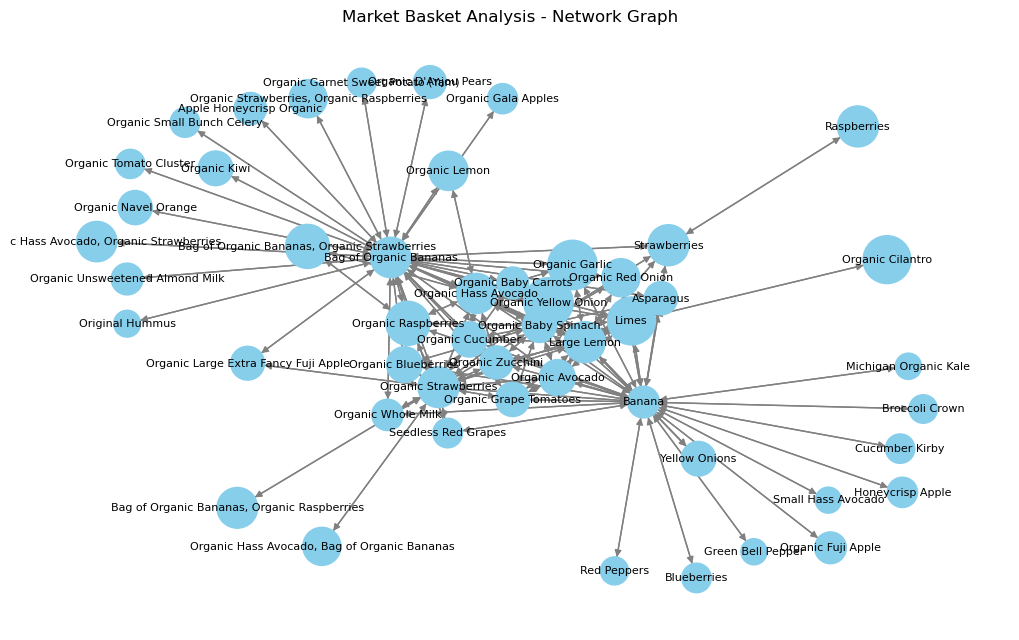

In [170]:
import networkx as nx
import matplotlib.pyplot as plt

# Convert frozensets to strings for visualization
rules['antecedents_str'] = rules['antecedents'].apply(lambda a: ', '.join(list(a)))
rules['consequents_str'] = rules['consequents'].apply(lambda a: ', '.join(list(a)))

# Create a directed graph
G = nx.from_pandas_edgelist(rules, source='antecedents_str', target='consequents_str', edge_attr=True, create_using=nx.DiGraph())

# Create a dictionary of node sizes based on the maximum confidence of outgoing edges
node_sizes = {node: 200 * max([d['lift'] for n, _, d in G.out_edges(node, data=True)], default=1) for node in G.nodes()}

# Draw the graph with node sizes based on confidence
plt.figure(figsize=(10, 6))
nx.draw(G, with_labels=True, node_color='skyblue', node_size=[node_sizes[node] for node in G.nodes()], edge_color='grey', font_size=8)
plt.title('Market Basket Analysis - Network Graph')
plt.show()

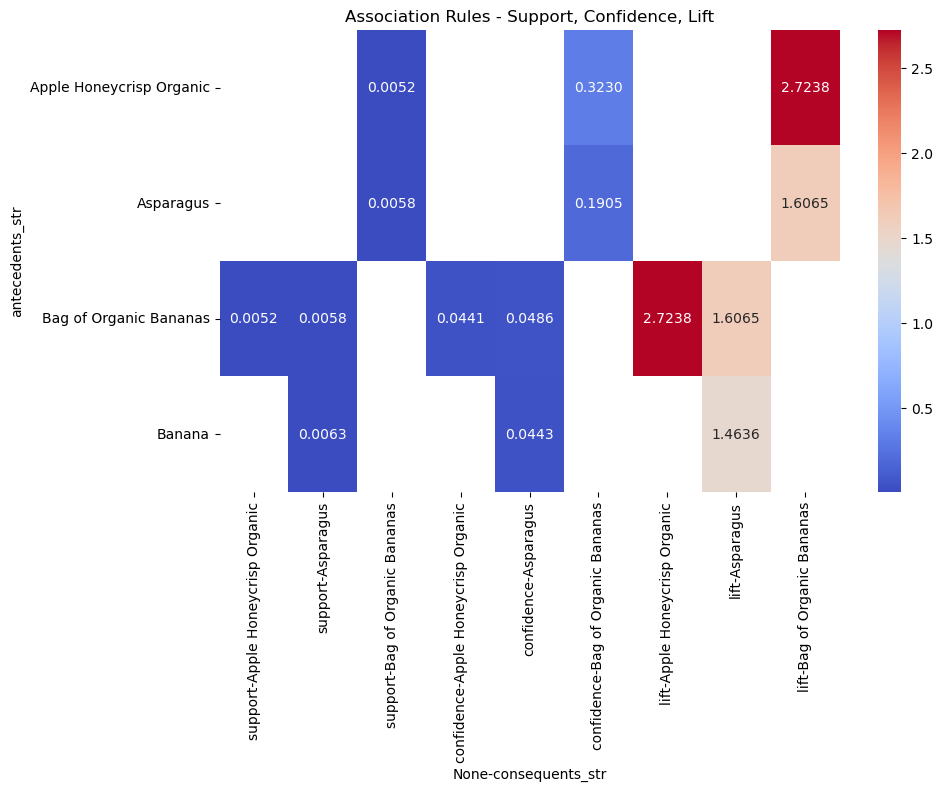

In [168]:
# Convert frozensets to strings for visualization
rules['antecedents_str'] = rules['antecedents'].apply(lambda a: ', '.join(list(a)))
rules['consequents_str'] = rules['consequents'].apply(lambda a: ', '.join(list(a)))

# Pivot the DataFrame for better visualization
heatmap_data = rules.head(5).pivot(index='antecedents_str', columns='consequents_str', values=['support', 'confidence', 'lift'])

# Create a heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(heatmap_data, annot=True, fmt='.4f', cmap='coolwarm')
plt.title('Association Rules - Support, Confidence, Lift')
plt.show()